In [1]:
# conda install pandas
# conda install statsmodel
# !python
# !conda install -c conda-forge statsmodels
# !pip install --upgrade python
# !pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import array
import matplotlib
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv("../6363_6/hprice.csv")

In [4]:
data.head()

,Unnamed: 0,price,crime,nox,rooms,dist,radial,proptax,stratio,lowstat,lprice,lnox,lproptax
0,1,24000,0.006,5.38,6.57,4.09,1,29.600000,15.300000,4.98,10.085809,1.682688,5.690360
1,2,21599,0.027,4.69,6.42,4.97,2,24.200001,17.799999,9.14,9.980402,1.545433,5.488938
2,3,34700,0.027,4.69,7.18,4.97,2,24.200001,17.799999,4.03,10.454495,1.545433,5.488938
3,4,33400,0.032,4.58,7.00,6.06,3,22.200001,18.700001,2.94,10.416311,1.521699,5.402678
4,5,36199,0.069,4.58,7.15,6.06,3,22.200001,18.700001,5.33,10.496787,1.521699,5.402678


## Redo part. review code.

### Plot housing prices against pollution (put nitrogen 

In [5]:
import seaborn as sb
sb.set_style()

<AxesSubplot:xlabel='nox', ylabel='price'>

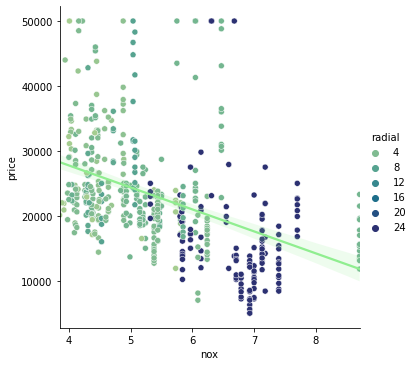

In [6]:
sb.relplot(
    data=data,
    x="nox", y="price",
    hue="radial",
    palette= "crest"
 
)
sb.regplot(x = 'nox', 
           y = 'price', 
           data = (data),
          scatter = False,
           color = 'lightgreen'
)

# sb.lmplot(data=data, x="nox", y="price", hue="radial")

#------------------------------------------
# seaborn ==== ggplot
# style === group 
# col === facet
# hue === coulor


In [19]:
# pip install plotly==4.14.3
# !pip install sklearn
# !conda install -c conda-forge statsmodels # run it in command line. it prompts
 

^C


import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression

In [15]:
model = LinearRegression()
model.fit(np.array(data.nox).reshape(-1,1), np.array(data.price).reshape(-1,1))
x_range = np.linspace(data.nox.min(), data.nox.max(), 100)
y_range = model.predict(x_range.reshape(-1,1))

In [16]:
# np.array(data.price).reshape(-1,1)

In [17]:
import plotly.express as px
fig = px.scatter(data, x = 'nox', 
           y = 'price', color = 'nox', trendline='ols', trendline_color_override='darkblue')
fig.add_traces(go.Scatter(x=x_range, y=y_range, name='Regression Fit'))
fig.show()

ModuleNotFoundError: No module named 'statsmodels'

In [1]:
# pip install dash==1.18.1
# !pip install jupyter-dash
1+1

2

## Reg

In [19]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [27]:
# Note the difference in argument order
model = smf.ols('price ~ nox + crime', data = data).fit()

In [41]:
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     76.98
Date:                Thu, 07 Jan 2021   Prob (F-statistic):           6.82e-30
Time:                        06:26:41   Log-Likelihood:                -5268.7
No. Observations:                 506   AIC:                         1.054e+04
Df Residuals:                     503   BIC:                         1.056e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.758e+04   1868.701     20.110      0.000    3.39e+04    4.13e+04
nox        -2538.3095    341.962     -7.423      0.000   -3210.159   -1866.460
crime       -271.6976     46.114     -5.892      0.000    -362.297    -181.099
==============================================================================
Omnibus:                      178.278   Durbin-Watson:                   0.719
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              500.468
Skew:                           1.737   Prob(JB):                    2.11e-109
Kurtosis:                       6.417   Cond. No.                         51.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### f test 

In [40]:
from scipy.stats import f

In [74]:
A = np.identity(len(model.params))
A = A[1:,:]
A

array([[0., 1., 0.],
       [0., 0., 1.]])

In [75]:
# hypotheses = '(GNPDEFL = GNP), (UNEMP = 2), (YEAR/1829 = 1)'
model.f_test(A)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[76.97873479]]), p=6.819124681689661e-30, df_denom=503, df_num=2>

## homework 4

In [1]:
df4 = pd.read_csv("cps_extract_2004.csv")

NameError: name 'pd' is not defined

In [6]:
df4.head()

,age,sex,race,region,educ,exper,earnings,weeks,hours
0,46,2,1,1,18.0,22,60000,52,40
1,43,1,1,1,14.0,23,180000,48,45
2,49,2,1,3,12.0,31,48700,52,40
3,48,1,1,2,16.0,26,30000,52,60
4,45,1,1,3,14.0,25,66000,52,85


In [18]:
# df4.insert(2, column =2, value = [df4.hours * df4.weeks])
df4 = pd.concat([df4,(df4.hours * df4.weeks)], axis = 1)
df4 = df4.rename(columns = {0:'annual_hour'})

In [58]:
df4['wage'] = np.array(df4.earnings/df4.annual_hour)

In [83]:
 df4[df4.region == 1]

,age,sex,race,region,educ,exper,earnings,weeks,hours,annual_hour,wage
0,46,2,1,1,18.0,22,60000,52,40,2080,28.846154
1,43,1,1,1,14.0,23,180000,48,45,2160,83.333333
6,46,1,1,1,10.0,28,10000,52,40,2080,4.807692
7,36,2,1,1,7.5,18,12000,52,40,2080,5.769231
8,41,1,1,1,12.0,23,26000,52,45,2340,11.111111
...,...,...,...,...,...,...,...,...,...,...,...
2125,29,1,1,1,12.0,11,52000,52,70,3640,14.285714
2126,47,1,1,1,14.0,27,45000,52,40,2080,21.634615
2127,34,2,1,1,14.0,14,23000,12,40,480,47.916667
2128,46,2,1,1,18.0,22,6500,35,12,420,15.476190


In [ ]:
# df4['northeast'] =

In [ ]:
# df['Flag'] = df.groupby('Product')['Index'].transform(lambda x: 'right' if sum(x)/len(x) == 1 else 'wrong')
# df['Flag'] = df['Product'].map(df.groupby('Product')['Index'].unique().apply(lambda row: 'right' if all(row==[1]) else 'wrong'))


In [3]:
import numpy
numpy.__version__

'1.19.2'

In [5]:
rng = np.random.RandomState(0)
[-6, -14] + [14, 18] * rng.rand(2000, 2)

array([[ 1.68338905, -1.12659141],
       [ 2.43868727, -4.19210271],
       [-0.06883281, -2.37390596],
       ...,
       [-4.32134532, -7.70649139],
       [ 0.08823081,  0.94005305],
       [ 7.05928655, -8.44990818]])